In [1]:
# Imports
import os
import requests
import pandas as pd
#import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv
import yfinance as yf
import numpy as np
from itertools import product

%matplotlib inline

C:\Users\jorda\anaconda3\envs\pyvizenv\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)



Bad key "text.kerning_factor" on line 4 in
C:\Users\jorda\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Stock Protfolio Info & Table
stocks = ['2357.TW', 'AAPL', 'AC.TO', 'CCL', 'CM-PQ.TO', 'F', 'MSFT', 'NVDA', 'PFE', 'TSLA']

stockportfolio = {
    'Asset' : stocks,
    'Amount' : [100, 1000, 1000, 1000, 1000, 100, 100, 1000, 100, 100],
    'Cost' : [367, 25.91, 28.13, 23.76, 15.19, 265.02, 761.24, 38.98, 349.46, 671.87]
}

#Creating a dataframe using the dictionary
stockportfoliotable = pd.DataFrame.from_dict(stockportfolio, orient='index')
stockportfoliotable = stockportfoliotable.transpose()
stockportfoliotable = stockportfoliotable.set_index('Asset')
stockportfoliotable['Cost Basis'] = stockportfoliotable.Amount * stockportfoliotable.Cost
stocktotalcostbasis = stockportfoliotable['Cost Basis'].sum()
stockportfoliotable['Position %'] = stockportfoliotable['Cost Basis'] / stocktotalcostbasis

#Create Stock Weight List for MC Simulation
stockweight = stockportfoliotable['Position %'].to_list()

stockportfoliotable

Amount    Cost Cost Basis Position %
Asset                                        
2357.TW     100     367      36700  0.0982784
AAPL       1000   25.91      25910   0.069384
AC.TO      1000   28.13      28130  0.0753289
CCL        1000   23.76      23760  0.0636266
CM-PQ.TO   1000   15.19      15190  0.0406771
F           100  265.02      26502  0.0709693
MSFT        100  761.24      76124   0.203851
NVDA       1000   38.98      38980   0.104384
PFE         100  349.46      34946  0.0935814
TSLA        100  671.87      67187   0.179919

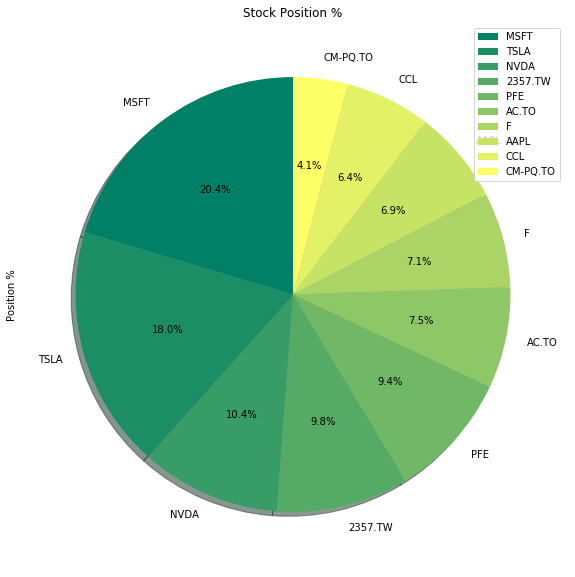

In [4]:
# Create a Pie Chart of the Portfolio Data
stockportsorted = stockportfoliotable.sort_values(['Position %'], ascending=False)

stockportsorted = stockportsorted.plot(kind='pie', y='Position %', shadow = True, startangle=90,
                                figsize=(15,10), autopct='%1.1f%%', title='Stock Position %', colormap='summer')

stockportsorted = pn.panel(stockportsorted)

In [5]:
#Getting Sector info for Pie Chart
#sectors = []
#for i in stocks:
    #tickers = yf.Tickers(i)
    #sectors.append((tickers.tickers[i]).info[sector])
#sectors

In [6]:
# Stock Protfolio Info & Table
crypto = ['ADA-USD', 'BTC-USD', 'ETH-USD', 'LINK-USD', 'LTC-USD']

cryptoportfolio = {
    'Asset' : crypto,
    'Amount' : [10000, 1, 10, 1000, 100],
    'Cost' : [1.2902, 32870.84, 1865.51, 17.25, 128.45]
}

#Creating a dataframe using the dictionary
cryptoportfoliotable = pd.DataFrame.from_dict(cryptoportfolio, orient='index')
cryptoportfoliotable = cryptoportfoliotable.transpose()
cryptoportfoliotable = cryptoportfoliotable.set_index('Asset')
cryptoportfoliotable['Cost Basis'] = cryptoportfoliotable.Amount * cryptoportfoliotable.Cost
cryptototalcostbasis = cryptoportfoliotable['Cost Basis'].sum()
cryptoportfoliotable['Position %'] = cryptoportfoliotable['Cost Basis'] / cryptototalcostbasis

cryptoweight = cryptoportfoliotable['Position %'].to_list()
cryptoportfoliotable

Amount     Cost Cost Basis Position %
Asset                                         
ADA-USD   10000   1.2902      12902   0.136496
BTC-USD       1  32870.8    32870.8   0.347755
ETH-USD      10  1865.51    18655.1   0.197361
LINK-USD   1000    17.25      17250   0.182495
LTC-USD     100   128.45      12845   0.135893

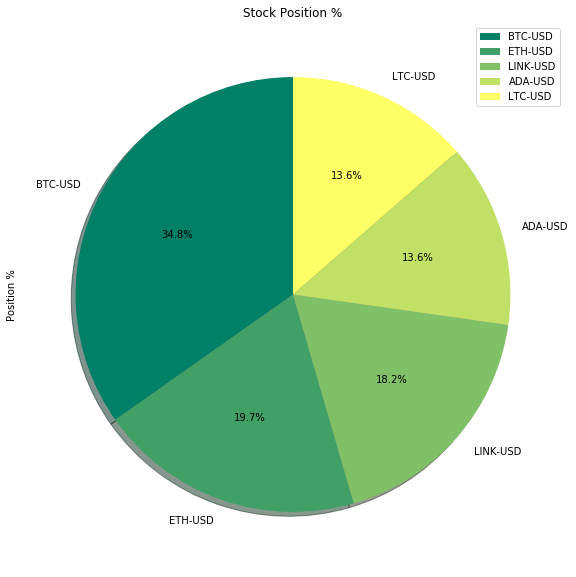

In [7]:
# Create a Pie Chart of the Portfolio Data
cryptoportsorted = cryptoportfoliotable.sort_values(['Position %'], ascending=False)

cryptoportsorted = cryptoportsorted.plot(kind='pie', y='Position %', shadow = True, startangle=90,
                                figsize=(15,10), autopct='%1.1f%%', title='Stock Position %', colormap='summer')

In [8]:
#Total Portfolio Data
totalportfoliotable = pd.concat([stockportfoliotable, cryptoportfoliotable])
del totalportfoliotable['Position %']
totalcostbasis = stocktotalcostbasis + cryptototalcostbasis
totalportfoliotable['Position %'] = totalportfoliotable['Cost Basis'] / totalcostbasis
totalportfoliotable

Amount     Cost Cost Basis Position %
Asset                                         
2357.TW     100      367      36700  0.0784269
AAPL       1000    25.91      25910  0.0553689
AC.TO      1000    28.13      28130   0.060113
CCL        1000    23.76      23760  0.0507744
CM-PQ.TO   1000    15.19      15190  0.0324606
F           100   265.02      26502   0.056634
MSFT        100   761.24      76124   0.162675
NVDA       1000    38.98      38980  0.0832992
PFE         100   349.46      34946  0.0746786
TSLA        100   671.87      67187   0.143577
ADA-USD   10000   1.2902      12902  0.0275712
BTC-USD       1  32870.8    32870.8  0.0702441
ETH-USD      10  1865.51    18655.1  0.0398654
LINK-USD   1000    17.25      17250  0.0368628
LTC-USD     100   128.45      12845  0.0274494

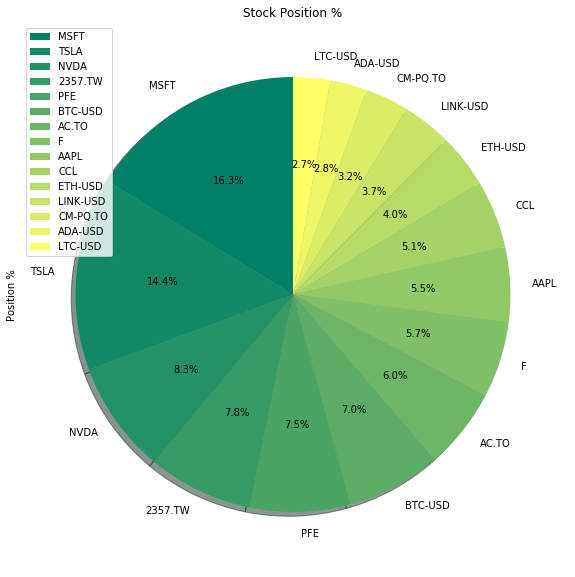

In [9]:
# Create a Pie Chart of the Portfolio Data
totalportsorted = totalportfoliotable.sort_values(['Position %'], ascending=False)

totalportsorted = totalportsorted.plot(kind='pie', y='Position %', shadow = True, startangle=90,
                                figsize=(15,10), autopct='%1.1f%%', title='Stock Position %', colormap='summer')

In [10]:
# Stock Data
stock_close = yf.download(stocks, group_by='Ticker', period='10y')

# Create CSV of ticker data
stock_close.to_csv('stocks.csv')

stock_close = stock_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

stock_close = pd.read_csv('stocks.csv', header=[0, 1])
stock_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
stock_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(stock_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
stock_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
stock_close.index.name = None

# Drop Null Information
stock_close = stock_close.dropna()

# Sort Multi-Index To Match Weights
stock_close = stock_close.reindex(sorted(stock_close.columns), axis=1)

stock_close

[*********************100%***********************]  10 of 10 completed


2357.TW                                               AAPL  \
             Adj Close  Close   High    Low   Open     Volume   Adj Close   
2015-03-11  223.824799  322.0  326.5  322.0  323.0  2017000.0   27.859491   
2015-03-12  225.215042  324.0  325.5  321.5  322.0  1818000.0   28.363159   
2015-03-13  224.172363  322.5  325.0  322.0  323.0  2127000.0   28.167162   
2015-03-16  221.044373  318.0  323.0  316.0  320.0  4840000.0   28.477116   
2015-03-17  220.696838  317.5  322.5  315.0  320.5  3586000.0   28.953447   
...                ...    ...    ...    ...    ...        ...         ...   
2021-06-28  372.500000  372.5  374.0  365.0  368.5  3777733.0  134.779999   
2021-06-29  370.000000  370.0  374.0  370.0  373.0  2028525.0  136.330002   
2021-06-30  371.500000  371.5  375.0  370.0  371.5  2792667.0  136.960007   
2021-07-02  371.000000  371.0  372.0  367.0  368.5  1789983.0  139.960007   
2021-07-06  376.000000  376.0  378.0  375.5  378.0  1698955.0  142.020004   

                                                ...        PFE             \
                 Close        High         Low  ...       High        Low   
2015-03-11   30.559999   31.192499   30.527500  ...  32.352940  31.907021   
2015-03-12   31.112499   31.225000   30.407499  ...  32.314991  32.049335   
2015-03-13   30.897499   31.350000   30.645000  ...  32.258064  31.973434   
2015-03-16   31.237499   31.237499   30.717501  ...  32.789375  32.220116   
2015-03-17   31.760000   31.830000   31.412500  ...  32.542694  32.201138   
...                ...         ...         ...  ...        ...        ...   
2021-06-28  134.779999  135.250000  133.350006  ...  39.209999  38.900002   
2021-06-29  136.330002  136.490005  134.350006  ...  39.279999  38.980000   
2021-06-30  136.960007  137.410004  135.869995  ...  39.270000  38.820000   
2021-07-02  139.960007  140.000000  137.750000  ...  39.830002  39.380001   
2021-07-06  142.020004  143.149994  140.089996  ...  39.650002  39.040001   

                                         TSLA                          \
                 Open      Volume   Adj Close       Close        High   
2015-03-11  32.239090  26996840.0   38.748001   38.748001   39.236000   
2015-03-12  32.077801  29699085.0   38.214001   38.214001   38.889999   
2015-03-13  32.182163  29596847.0   37.736000   37.736000   38.349998   
2015-03-16  32.333965  30615643.0   39.139999   39.139999   39.181999   
2015-03-17  32.371918  21746760.0   38.945999   38.945999   39.742001   
...               ...         ...         ...         ...         ...   
2021-06-28  39.009998  19225700.0  688.719971  688.719971  694.700012   
2021-06-29  39.130001  14516600.0  680.760010  680.760010  687.510010   
2021-06-30  39.139999  21248100.0  679.700012  679.700012  692.809998   
2021-07-02  39.459999  16592700.0  678.900024  678.900024  700.000000   
2021-07-06  39.480000  17838134.0  659.580017  659.580017  684.000000   

                                                
                   Low        Open      Volume  
2015-03-11   38.202000   38.230000  24874500.0  
2015-03-12   37.950001   38.750000  20746500.0  
2015-03-13   37.464001   37.790001  27171500.0  
2015-03-16   37.959999   38.400002  28144000.0  
2015-03-17   38.787998   39.085999  24470500.0  
...                ...         ...         ...  
2021-06-28  670.320007  671.640015  21628200.0  
2021-06-29  675.890015  684.650024  17381300.0  
2021-06-30  678.140015  679.770020  18924900.0  
2021-07-02  673.260010  678.979980  27054500.0  
2021-07-06  651.400208  681.711487  23284450.0  

[1466 rows x 60 columns]

In [11]:
#Stock Average True Range (ATR)
def Average_True_Range(stock_close,Ticker):
    high_low = stock_close[Ticker]['High'] - stock_close[Ticker]['Low']
    high_cp = np.abs(stock_close[Ticker]['High'] - stock_close[Ticker]['Close'].shift())
    low_cp = np.abs(stock_close[Ticker]['Low'] - stock_close[Ticker]['Close'].shift())
    df = pd.concat([high_low, high_cp, low_cp], axis = 1)
    tr = np.max(df, axis = 1)
    average_true_range = tr.rolling(14).mean()
    return average_true_range[-1]
stocksatr = []
for i in stocks:
     stocksatr.append(Average_True_Range(stock_close, i))
        
#Stocks Close Price
def Close_Price(stock_close,Ticker):
    close_price = stock_close[Ticker]['Close']
    return close_price[-1]
stockclose = []
for i in stocks:
    stockclose.append(Close_Price(stock_close, i))

#Market Value for Stocks
stockportfoliotable['Recent Close'] = stockclose
stockportfoliotable['Market Value'] = stockportfoliotable['Recent Close'] * stockportfoliotable['Amount']

#Stocks Portifolio with ATR
stockportfoliotable['ATR'] = stocksatr
stockportfoliotable['ATR %'] = stockportfoliotable['ATR'] / stockportfoliotable['Recent Close']
stockportfoliotable

Amount    Cost Cost Basis Position %  Recent Close Market Value  \
Asset                                                                      
2357.TW     100     367      36700  0.0982784    376.000000        37600   
AAPL       1000   25.91      25910   0.069384    142.020004       142020   
AC.TO      1000   28.13      28130  0.0753289     26.510000        26510   
CCL        1000   23.76      23760  0.0636266     25.020000        25020   
CM-PQ.TO   1000   15.19      15190  0.0406771     23.770000        23770   
F           100  265.02      26502  0.0709693     14.500000         1450   
MSFT        100  761.24      76124   0.203851    277.660004        27766   
NVDA       1000   38.98      38980   0.104384    827.940002       827940   
PFE         100  349.46      34946  0.0935814     39.290001         3929   
TSLA        100  671.87      67187   0.179919    659.580017        65958   

                ATR     ATR %  
Asset                          
2357.TW    6.107143  0.016242  
AAPL       2.265715  0.015953  
AC.TO      0.696428  0.026270  
CCL        1.016314  0.040620  
CM-PQ.TO   0.157858  0.006641  
F          0.421428  0.029064  
MSFT       3.978911  0.014330  
NVDA      22.238582  0.026860  
PFE        0.545714  0.013889  
TSLA      22.620688  0.034296

In [12]:
#Total Market value for Stocks
totalstockvalue = stockportfoliotable['Market Value'].sum()
totalstockvalue

1181963.0100250244

In [13]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_stock_one_year = MCSimulation(
    portfolio_data = stock_close,
    weights = stockweight,
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [14]:
# Printing the simulation input data
MC_stock_one_year.portfolio_data.head()

2357.TW                                                      \
             Adj Close  Close   High    Low   Open     Volume daily_return   
2015-03-11  223.824799  322.0  326.5  322.0  323.0  2017000.0          NaN   
2015-03-12  225.215042  324.0  325.5  321.5  322.0  1818000.0     0.006211   
2015-03-13  224.172363  322.5  325.0  322.0  323.0  2127000.0    -0.004630   
2015-03-16  221.044373  318.0  323.0  316.0  320.0  4840000.0    -0.013953   
2015-03-17  220.696838  317.5  322.5  315.0  320.5  3586000.0    -0.001572   

                 AAPL                        ...        PFE              \
            Adj Close      Close       High  ...       Open      Volume   
2015-03-11  27.859491  30.559999  31.192499  ...  32.239090  26996840.0   
2015-03-12  28.363159  31.112499  31.225000  ...  32.077801  29699085.0   
2015-03-13  28.167162  30.897499  31.350000  ...  32.182163  29596847.0   
2015-03-16  28.477116  31.237499  31.237499  ...  32.333965  30615643.0   
2015-03-17  28.953447  31.760000  31.830000  ...  32.371918  21746760.0   

                              TSLA                                   \
           daily_return  Adj Close      Close       High        Low   
2015-03-11          NaN  38.748001  38.748001  39.236000  38.202000   
2015-03-12     0.011002  38.214001  38.214001  38.889999  37.950001   
2015-03-13     0.000000  37.736000  37.736000  38.349998  37.464001   
2015-03-16     0.012941  39.139999  39.139999  39.181999  37.959999   
2015-03-17    -0.007840  38.945999  38.945999  39.742001  38.787998   

                                                
                 Open      Volume daily_return  
2015-03-11  38.230000  24874500.0          NaN  
2015-03-12  38.750000  20746500.0    -0.013781  
2015-03-13  37.790001  27171500.0    -0.012509  
2015-03-16  38.400002  28144000.0     0.037206  
2015-03-17  39.085999  24470500.0    -0.004957  

[5 rows x 70 columns]

In [15]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_stock_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.983585  0.994386  1.007145  1.002811  1.001822  1.011914  1.006619   
2    0.992392  0.983282  1.011698  1.003891  1.002249  1.010479  1.002790   
3    1.007116  0.976571  0.997305  1.018896  1.007131  1.008849  1.009228   
4    1.000860  0.981344  1.007173  1.033375  0.997291  1.016548  1.002717   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.356122  1.169325  1.604434  1.127775  1.471971  1.339257  1.533348   
249  1.374676  1.166385  1.596240  1.128400  1.463370  1.360016  1.554380   
250  1.362104  1.159308  1.609985  1.123532  1.462715  1.341683  1.597715   
251  1.378674  1.175482  1.595327  1.115218  1.466149  1.340777  1.579927   
252  1.373288  1.182528  1.600868  1.105931  1.482126  1.338269  1.585792   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.006148  1.005245  1.008140  ...  1.002503  0.994230  0.990027   
2    1.008388  1.002954  1.007845  ...  0.988674  0.999419  0.994210   
3    1.002492  1.006182  1.015126  ...  0.987883  0.991810  0.993411   
4    1.017093  1.005777  1.028994  ...  0.983743  0.998250  0.994569   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.388194  1.316619  1.782321  ...  0.979377  1.741954  1.639027   
249  1.401588  1.347006  1.791834  ...  0.979314  1.743507  1.627760   
250  1.394529  1.357269  1.813984  ...  0.975648  1.755380  1.643279   
251  1.377798  1.379782  1.829151  ...  0.968363  1.789379  1.642019   
252  1.389491  1.386483  1.838253  ...  0.959278  1.834318  1.649740   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.993441  0.998796  1.007419  0.998193  1.002662  0.996550  1.008007  
2    0.991294  1.011094  1.004644  0.995260  0.986382  1.009261  1.008674  
3    1.001236  1.016017  1.022995  0.979151  0.980008  1.000061  1.016017  
4    1.022703  1.032252  1.026662  1.002275  0.978363  0.997872  1.005612  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.332593  1.230310  1.337734  1.466791  1.395886  1.306695  1.448433  
249  1.337975  1.235560  1.332764  1.479047  1.390725  1.311236  1.423843  
250  1.338114  1.245789  1.327871  1.473619  1.410038  1.319463  1.423679  
251  1.335291  1.232345  1.342589  1.472595  1.415194  1.332043  1.432841  
252  1.345388  1.237222  1.349962  1.485820  1.408058  1.344287  1.457535  

[253 rows x 500 columns]

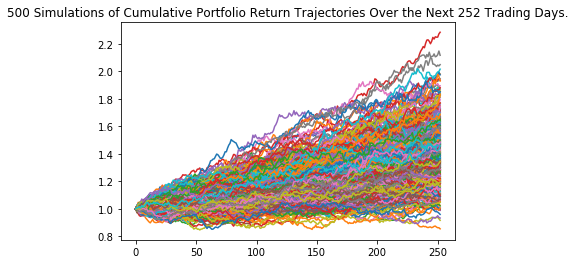

In [16]:
# Plot simulation outcomes
stock_oneyr_line_plot = MC_stock_one_year.plot_simulation()

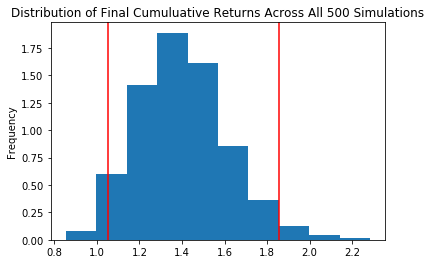

In [17]:
# Plot probability distribution and confidence intervals
stock_oneyr_dist_plot = MC_stock_one_year.plot_distribution()

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_oneyr_tbl = MC_stock_one_year.summarize_cumulative_return()

# Print summary statistics
print(stock_oneyr_tbl)

count           500.000000
mean              1.399436
std               0.211715
min               0.854163
25%               1.241760
50%               1.378610
75%               1.526104
max               2.283938
95% CI Lower      1.050813
95% CI Upper      1.854905
Name: 252, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_stockone = round(stock_oneyr_tbl[8],2)
ci_mean_stockone = round(stock_oneyr_tbl[1],2)
ci_upper_stockone = round(stock_oneyr_tbl[9],2)

print(ci_lower_stockone, ci_mean_stockone, ci_upper_stockone)

1.05 1.4 1.85


In [20]:
# Configuring a Monte Carlo simulation to forecast 5 year cumulative returns
MC_stock_five_year = MCSimulation(
    portfolio_data = stock_close,
    weights = stockweight,
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [21]:
# Printing the simulation input data
MC_stock_five_year.portfolio_data.head()

2357.TW                                                      \
             Adj Close  Close   High    Low   Open     Volume daily_return   
2015-03-11  223.824799  322.0  326.5  322.0  323.0  2017000.0          NaN   
2015-03-12  225.215042  324.0  325.5  321.5  322.0  1818000.0     0.006211   
2015-03-13  224.172363  322.5  325.0  322.0  323.0  2127000.0    -0.004630   
2015-03-16  221.044373  318.0  323.0  316.0  320.0  4840000.0    -0.013953   
2015-03-17  220.696838  317.5  322.5  315.0  320.5  3586000.0    -0.001572   

                 AAPL                        ...        PFE              \
            Adj Close      Close       High  ...       Open      Volume   
2015-03-11  27.859491  30.559999  31.192499  ...  32.239090  26996840.0   
2015-03-12  28.363159  31.112499  31.225000  ...  32.077801  29699085.0   
2015-03-13  28.167162  30.897499  31.350000  ...  32.182163  29596847.0   
2015-03-16  28.477116  31.237499  31.237499  ...  32.333965  30615643.0   
2015-03-17  28.953447  31.760000  31.830000  ...  32.371918  21746760.0   

                              TSLA                                   \
           daily_return  Adj Close      Close       High        Low   
2015-03-11          NaN  38.748001  38.748001  39.236000  38.202000   
2015-03-12     0.011002  38.214001  38.214001  38.889999  37.950001   
2015-03-13     0.000000  37.736000  37.736000  38.349998  37.464001   
2015-03-16     0.012941  39.139999  39.139999  39.181999  37.959999   
2015-03-17    -0.007840  38.945999  38.945999  39.742001  38.787998   

                                                
                 Open      Volume daily_return  
2015-03-11  38.230000  24874500.0          NaN  
2015-03-12  38.750000  20746500.0    -0.013781  
2015-03-13  37.790001  27171500.0    -0.012509  
2015-03-16  38.400002  28144000.0     0.037206  
2015-03-17  39.085999  24470500.0    -0.004957  

[5 rows x 70 columns]

In [22]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_stock_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997336  0.993627  1.004658  0.996477  0.999003  0.982837  1.009338   
2     0.985723  0.978164  1.019987  0.995009  1.021365  0.981011  1.015474   
3     0.988223  0.973613  1.020839  0.984466  1.017057  0.988842  1.015993   
4     0.980312  0.958278  1.009192  0.983651  1.013280  0.989420  1.020201   
...        ...       ...       ...       ...       ...       ...       ...   
1256  4.343673  2.894653  4.682707  4.526973  4.364835  3.768898  2.994780   
1257  4.370153  2.887268  4.659161  4.545115  4.343648  3.726756  3.001811   
1258  4.403848  2.903920  4.657487  4.638602  4.351069  3.725342  3.051559   
1259  4.421965  2.916908  4.706275  4.618695  4.372896  3.740112  3.053735   
1260  4.405836  2.899080  4.750164  4.626155  4.280413  3.777954  3.035707   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.995844  1.000040  0.995287  ...  0.997895  1.002746  1.009847   
2     1.001347  1.007823  0.989276  ...  0.979576  0.986837  1.017381   
3     1.000658  1.008474  0.987882  ...  0.979785  0.963226  1.039031   
4     1.002323  1.025634  0.990260  ...  0.976660  0.965920  1.035127   
...        ...       ...       ...  ...       ...       ...       ...   
1256  6.133521  5.395699  4.580568  ...  5.607305  6.504370  6.636978   
1257  6.148872  5.348553  4.671019  ...  5.626712  6.522271  6.667188   
1258  6.093357  5.406079  4.613097  ...  5.662345  6.542284  6.773875   
1259  6.138971  5.445871  4.654575  ...  5.705975  6.538714  6.660848   
1260  6.080049  5.377970  4.701573  ...  5.752910  6.499369  6.656511   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.001606  1.006034  0.982851  1.001303  0.994109  1.001083  0.986236  
2     0.987464  1.002662  0.976688  1.005264  1.007781  0.999807  0.984789  
3     1.000743  1.003818  0.986041  1.006334  1.005137  0.991203  0.987022  
4     1.013707  1.008686  0.984327  1.007755  0.996931  0.980629  0.986344  
...        ...       ...       ...       ...       ...       ...       ...  
1256  4.464843  5.254593  3.611175  6.134198  7.158215  4.838282  4.670820  
1257  4.469672  5.327547  3.572999  6.161658  7.126181  4.889537  4.682216  
1258  4.455347  5.347970  3.581679  6.222785  7.048854  4.877984  4.739212  
1259  4.457599  5.417241  3.648576  6.221990  7.017700  4.887678  4.745713  
1260  4.530865  5.434367  3.624108  6.229997  6.898189  4.866752  4.785122  

[1261 rows x 500 columns]

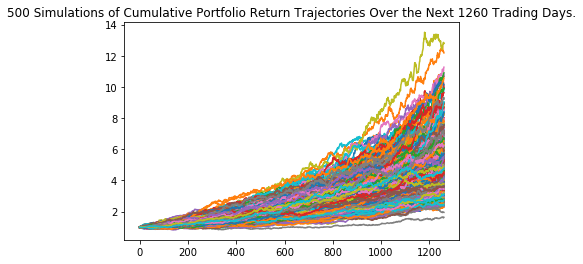

In [23]:
# Plot simulation outcomes
stock_fiveyr_line_plot = MC_stock_five_year.plot_simulation()

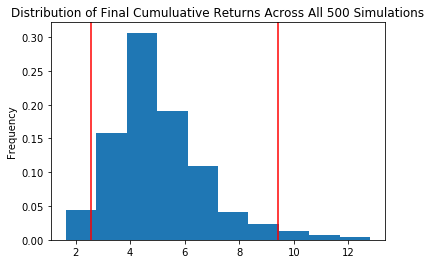

In [24]:
# Plot probability distribution and confidence intervals
stock_fiveyr_dist_plot = MC_stock_five_year.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_fiveyr_tbl = MC_stock_five_year.summarize_cumulative_return()

# Print summary statistics
print(stock_fiveyr_tbl)

count           500.000000
mean              5.064722
std               1.697756
min               1.637849
25%               3.950262
50%               4.701468
75%               5.934749
max              12.794848
95% CI Lower      2.561294
95% CI Upper      9.429557
Name: 1260, dtype: float64


In [26]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_stockfive = round(stock_fiveyr_tbl[8],2)
ci_mean_stockfive = round(stock_fiveyr_tbl[1],2)
ci_upper_stockfive = round(stock_fiveyr_tbl[9],2)

print(ci_lower_stockfive, ci_mean_stockfive, ci_upper_stockfive)

2.56 5.06 9.43


In [27]:
# Crypto Data
crypto_close = yf.download(crypto, group_by='Ticker', period='10y')

# Create CSV of ticker data
crypto_close.to_csv('crypto.csv')

crypto_close = crypto_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

crypto_close = pd.read_csv('crypto.csv', header=[0, 1])
crypto_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
crypto_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(crypto_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
crypto_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
crypto_close.index.name = None

# Drop Null Information
crypto_close = crypto_close.dropna()

# Sort Multi-Index To Match Weights
crypto_close = crypto_close.reindex(sorted(crypto_close.columns), axis=1)

crypto_close

[*********************100%***********************]  5 of 5 completed


ADA-USD                                                        \
           Adj Close     Close      High       Low      Open        Volume   
2017-10-01  0.024969  0.024969  0.032226  0.017354  0.021678  5.006870e+07   
2017-10-02  0.025932  0.025932  0.030088  0.019969  0.024607  5.764130e+07   
2017-10-03  0.020816  0.020816  0.027425  0.020690  0.025757  1.699780e+07   
2017-10-04  0.021931  0.021931  0.022806  0.020864  0.020864  9.000050e+06   
2017-10-05  0.021489  0.021489  0.022154  0.020859  0.021951  5.562510e+06   
...              ...       ...       ...       ...       ...           ...   
2021-07-02  1.394397  1.394397  1.394397  1.286607  1.332942  2.159410e+09   
2021-07-03  1.406836  1.406836  1.441714  1.359664  1.394152  2.028094e+09   
2021-07-04  1.458184  1.458184  1.493717  1.382153  1.404008  1.806362e+09   
2021-07-05  1.404898  1.404898  1.461221  1.379284  1.461221  1.759461e+09   
2021-07-07  1.417981  1.417981  1.422199  1.405669  1.413191  1.488659e+09   

                 BTC-USD                                            ...  \
               Adj Close         Close          High           Low  ...   
2017-10-01   4403.740234   4403.740234   4403.740234   4269.810059  ...   
2017-10-02   4409.319824   4409.319824   4470.229980   4377.459961  ...   
2017-10-03   4317.479980   4317.479980   4432.470215   4258.890137  ...   
2017-10-04   4229.359863   4229.359863   4352.310059   4210.419922  ...   
2017-10-05   4328.410156   4328.410156   4362.640137   4164.049805  ...   
...                  ...           ...           ...           ...  ...   
2021-07-02  33897.046875  33897.046875  33939.589844  32770.679688  ...   
2021-07-03  34668.546875  34668.546875  34909.261719  33402.695312  ...   
2021-07-04  35287.781250  35287.781250  35937.566406  34396.476562  ...   
2021-07-05  33746.003906  33746.003906  35284.343750  33213.660156  ...   
2021-07-07  34193.996094  34193.996094  34363.257812  34001.296875  ...   

             LINK-USD                                         LTC-USD  \
                 High        Low       Open        Volume   Adj Close   
2017-10-01   0.451884   0.382034   0.451547  1.000510e+07   54.543301   
2017-10-02   0.440264   0.356767   0.437667  7.101340e+06   53.375999   
2017-10-03   0.367254   0.295817   0.367254  8.211990e+06   52.349602   
2017-10-04   0.398695   0.336883   0.343186  7.604930e+06   51.399502   
2017-10-05   0.417906   0.378043   0.397030  6.291110e+06   51.669498   
...               ...        ...        ...           ...         ...   
2021-07-02  18.520256  17.305502  18.220669  6.865419e+08  136.943695   
2021-07-03  18.886003  17.898075  18.285458  5.090763e+08  140.279694   
2021-07-04  19.894503  18.028957  18.548805  6.802681e+08  144.905853   
2021-07-05  19.246891  17.814753  19.246891  6.986191e+08  138.073242   
2021-07-07  20.151814  19.664604  19.972399  1.180090e+09  138.739410   

                                                                          
                 Close        High         Low        Open        Volume  
2017-10-01   54.543301   55.161598   53.625198   55.136200  1.001830e+08  
2017-10-02   53.375999   54.784801   53.257999   54.546902  9.547460e+07  
2017-10-03   52.349602   53.592999   51.586601   53.390400  8.851610e+07  
2017-10-04   51.399502   53.046101   50.830399   52.284302  7.747340e+07  
2017-10-05   51.669498   51.865501   50.440498   51.401402  6.959440e+07  
...                ...         ...         ...         ...           ...  
2021-07-02  136.943695  138.787704  130.935471  137.299271  1.418981e+09  
2021-07-03  140.279694  141.356018  134.945282  136.930588  1.236494e+09  
2021-07-04  144.905853  147.836060  137.096420  140.317993  1.431657e+09  
2021-07-05  138.073242  144.849335  134.960266  144.849335  1.338246e+09  
2021-07-07  138.739410  139.673355  138.038971  138.624146  1.536226e+09  

[1371 rows x 30 columns]

In [28]:
#Crypto Average True Range (ATR)
def Average_True_Range(crypto_close,Ticker):
    high_low = crypto_close[Ticker]['High'] - crypto_close[Ticker]['Low']
    high_cp = np.abs(crypto_close[Ticker]['High'] - crypto_close[Ticker]['Close'].shift())
    low_cp = np.abs(crypto_close[Ticker]['Low'] - crypto_close[Ticker]['Close'].shift())
    df = pd.concat([high_low, high_cp, low_cp], axis = 1)
    tr = np.max(df, axis = 1)
    average_true_range = tr.rolling(14).mean()
    return average_true_range[-1]
cryptoatr = []
for i in crypto:
    cryptoatr.append(Average_True_Range(crypto_close, i))

#Crypto Close Price
def Close_Price(crypto_close,Ticker):
    close_price = crypto_close[Ticker]['Close']
    return close_price[-1]
cryptoclose = []
for i in crypto:
    cryptoclose.append(Close_Price(crypto_close, i))

#Market Value for Crypto
cryptoportfoliotable['Recent Close'] = cryptoclose
cryptoportfoliotable['Market Value'] = cryptoportfoliotable['Recent Close'] * cryptoportfoliotable['Amount']
    
#Crypto Portifolio with ATR
cryptoportfoliotable['ATR'] = cryptoatr
cryptoportfoliotable['ATR %'] = cryptoportfoliotable['ATR'] / cryptoportfoliotable['Recent Close']
cryptoportfoliotable

Amount     Cost Cost Basis Position %  Recent Close Market Value  \
Asset                                                                       
ADA-USD   10000   1.2902      12902   0.136496      1.417981      14179.8   
BTC-USD       1  32870.8    32870.8   0.347755  34193.996094        34194   
ETH-USD      10  1865.51    18655.1   0.197361   2315.976074      23159.8   
LINK-USD   1000    17.25      17250   0.182495     20.109655      20109.7   
LTC-USD     100   128.45      12845   0.135893    138.739410      13873.9   

                  ATR     ATR %  
Asset                            
ADA-USD      0.104643  0.073797  
BTC-USD   2118.519671  0.061956  
ETH-USD    168.300555  0.072669  
LINK-USD     1.781643  0.088596  
LTC-USD      9.964387  0.071821

In [29]:
#Total Market value for Crypto
totalcryptovalue = cryptoportfoliotable['Market Value'].sum()
totalcryptovalue

105517.16115760803

In [30]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_crypto_one_year = MCSimulation(
    portfolio_data = crypto_close,
    weights = cryptoweight,
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [31]:
# Printing the simulation input data
MC_crypto_one_year.portfolio_data.head()

ADA-USD                                                      \
           Adj Close     Close      High       Low      Open      Volume   
2017-10-01  0.024969  0.024969  0.032226  0.017354  0.021678  50068700.0   
2017-10-02  0.025932  0.025932  0.030088  0.019969  0.024607  57641300.0   
2017-10-03  0.020816  0.020816  0.027425  0.020690  0.025757  16997800.0   
2017-10-04  0.021931  0.021931  0.022806  0.020864  0.020864   9000050.0   
2017-10-05  0.021489  0.021489  0.022154  0.020859  0.021951   5562510.0   

                             BTC-USD                            ...  LINK-USD  \
           daily_return    Adj Close        Close         High  ...      Open   
2017-10-01          NaN  4403.740234  4403.740234  4403.740234  ...  0.451547   
2017-10-02     0.038568  4409.319824  4409.319824  4470.229980  ...  0.437667   
2017-10-03    -0.197285  4317.479980  4317.479980  4432.470215  ...  0.367254   
2017-10-04     0.053565  4229.359863  4229.359863  4352.310059  ...  0.343186   
2017-10-05    -0.020154  4328.410156  4328.410156  4362.640137  ...  0.397030   

                                       LTC-USD                        \
                Volume daily_return  Adj Close      Close       High   
2017-10-01  10005100.0          NaN  54.543301  54.543301  55.161598   
2017-10-02   7101340.0    -0.182940  53.375999  53.375999  54.784801   
2017-10-03   8211990.0    -0.031483  52.349602  52.349602  53.592999   
2017-10-04   7604930.0     0.149988  51.399502  51.399502  53.046101   
2017-10-05   6291110.0     0.023095  51.669498  51.669498  51.865501   

                                                            
                  Low       Open       Volume daily_return  
2017-10-01  53.625198  55.136200  100183000.0          NaN  
2017-10-02  53.257999  54.546902   95474600.0    -0.021401  
2017-10-03  51.586601  53.390400   88516096.0    -0.019230  
2017-10-04  50.830399  52.284302   77473400.0    -0.018149  
2017-10-05  50.440498  51.401402   69594400.0     0.005253  

[5 rows x 35 columns]

In [32]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_crypto_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.970001  0.953211  1.002020  1.005165  0.977567  0.945929  0.929185   
2    0.988001  0.928401  0.985113  0.953790  1.006352  0.936937  0.970956   
3    0.976767  0.915416  1.017103  0.955420  0.983190  0.963207  0.975576   
4    1.044185  0.922128  1.072477  0.969235  0.967002  0.946340  0.967056   
..        ...       ...       ...       ...       ...       ...       ...   
248  2.702465  2.591178  4.469024  1.478333  1.913361  2.437579  2.846709   
249  2.758060  2.665522  4.505281  1.433201  1.907561  2.488628  2.754622   
250  2.813237  2.487870  4.403610  1.526416  1.916589  2.455990  2.876587   
251  2.987152  2.518664  4.349554  1.464023  1.834459  2.491862  2.909493   
252  3.044161  2.633176  4.212728  1.436080  1.767176  2.491609  2.976434   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.975175  1.026678  0.981683  ...  1.055827  1.009367  0.948576   
2    0.949205  1.035577  1.044026  ...  1.049554  1.061111  0.941496   
3    0.984008  1.042069  1.068048  ...  1.040043  1.061901  0.968616   
4    1.002088  1.058881  1.078062  ...  1.068223  1.053956  1.003689   
..        ...       ...       ...  ...       ...       ...       ...   
248  2.172583  1.561909  1.331627  ...  4.714089  2.009144  1.717969   
249  2.149406  1.605064  1.305142  ...  4.494940  1.921664  1.753717   
250  2.062449  1.565395  1.363410  ...  4.228553  1.913366  1.767239   
251  2.120448  1.521419  1.368150  ...  4.251491  1.908899  1.772597   
252  2.060857  1.485337  1.374088  ...  4.257758  1.856875  1.725529   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.993104  1.029734  0.973123  1.012070  1.055915  0.993737  1.013742  
2    0.996399  0.975207  1.018778  1.018159  0.996763  1.023842  0.982950  
3    0.989231  0.968036  1.022950  1.010470  0.998695  1.011850  0.964394  
4    0.969362  0.995790  1.047058  1.003559  1.009293  1.069607  0.970969  
..        ...       ...       ...       ...       ...       ...       ...  
248  2.767284  1.846749  2.508311  3.701360  2.107614  3.064281  2.790831  
249  2.843250  1.854782  2.617429  3.705631  2.084683  3.031778  2.893207  
250  2.872490  1.782102  2.531748  3.696688  2.169154  3.192240  3.057061  
251  2.830551  1.791475  2.586558  3.678306  2.125543  3.124776  3.070750  
252  2.853542  1.773836  2.541831  3.743756  2.112654  3.138735  3.027654  

[253 rows x 500 columns]

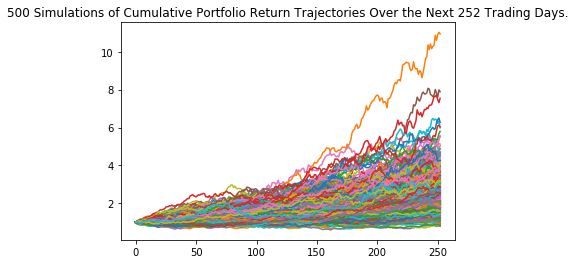

In [33]:
# Plot simulation outcomes
crypto_oneyr_line_plot = MC_crypto_one_year.plot_simulation()

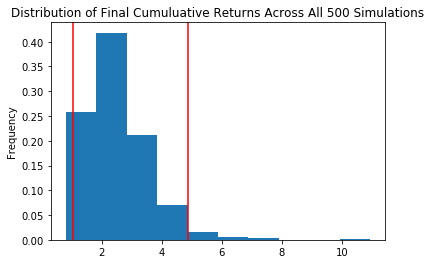

In [34]:
# Plot probability distribution and confidence intervals
crypto_oneyr_dist_plot = MC_crypto_one_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
crypto_oneyr_tbl = MC_crypto_one_year.summarize_cumulative_return()

# Print summary statistics
print(crypto_oneyr_tbl)

count           500.000000
mean              2.507062
std               1.095447
min               0.798407
25%               1.790046
50%               2.288329
75%               3.049940
max              10.939664
95% CI Lower      1.044375
95% CI Upper      4.882439
Name: 252, dtype: float64


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_cryptoone = round(crypto_oneyr_tbl[8],2)
ci_mean_cryptoone = round(crypto_oneyr_tbl[1],2)
ci_upper_cryptoone = round(crypto_oneyr_tbl[9],2)

print(ci_lower_cryptoone, ci_mean_cryptoone, ci_upper_cryptoone)

1.04 2.51 4.88


In [37]:
# Configuring a Monte Carlo simulation to forecast 5 year cumulative returns
MC_crypto_five_year = MCSimulation(
    portfolio_data = crypto_close,
    weights = cryptoweight,
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [38]:
# Printing the simulation input data
MC_crypto_five_year.portfolio_data.head()

ADA-USD                                                      \
           Adj Close     Close      High       Low      Open      Volume   
2017-10-01  0.024969  0.024969  0.032226  0.017354  0.021678  50068700.0   
2017-10-02  0.025932  0.025932  0.030088  0.019969  0.024607  57641300.0   
2017-10-03  0.020816  0.020816  0.027425  0.020690  0.025757  16997800.0   
2017-10-04  0.021931  0.021931  0.022806  0.020864  0.020864   9000050.0   
2017-10-05  0.021489  0.021489  0.022154  0.020859  0.021951   5562510.0   

                             BTC-USD                            ...  LINK-USD  \
           daily_return    Adj Close        Close         High  ...      Open   
2017-10-01          NaN  4403.740234  4403.740234  4403.740234  ...  0.451547   
2017-10-02     0.038568  4409.319824  4409.319824  4470.229980  ...  0.437667   
2017-10-03    -0.197285  4317.479980  4317.479980  4432.470215  ...  0.367254   
2017-10-04     0.053565  4229.359863  4229.359863  4352.310059  ...  0.343186   
2017-10-05    -0.020154  4328.410156  4328.410156  4362.640137  ...  0.397030   

                                       LTC-USD                        \
                Volume daily_return  Adj Close      Close       High   
2017-10-01  10005100.0          NaN  54.543301  54.543301  55.161598   
2017-10-02   7101340.0    -0.182940  53.375999  53.375999  54.784801   
2017-10-03   8211990.0    -0.031483  52.349602  52.349602  53.592999   
2017-10-04   7604930.0     0.149988  51.399502  51.399502  53.046101   
2017-10-05   6291110.0     0.023095  51.669498  51.669498  51.865501   

                                                            
                  Low       Open       Volume daily_return  
2017-10-01  53.625198  55.136200  100183000.0          NaN  
2017-10-02  53.257999  54.546902   95474600.0    -0.021401  
2017-10-03  51.586601  53.390400   88516096.0    -0.019230  
2017-10-04  50.830399  52.284302   77473400.0    -0.018149  
2017-10-05  50.440498  51.401402   69594400.0     0.005253  

[5 rows x 35 columns]

In [39]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_crypto_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1           2          3          4          5    \
0      1.000000   1.000000    1.000000   1.000000   1.000000   1.000000   
1      0.987453   1.021939    0.965584   0.997005   0.970468   1.050920   
2      0.956493   1.008412    0.970423   1.033323   0.961828   1.029521   
3      0.966690   1.057523    0.925928   1.033141   0.960647   1.003305   
4      0.978238   1.088315    0.955637   1.022672   0.962385   1.009223   
...         ...        ...         ...        ...        ...        ...   
1256  36.898149  42.114134  123.944873  38.934160  36.332134  56.087158   
1257  37.957417  40.788599  122.802062  40.180669  36.886902  55.906804   
1258  36.417817  41.987910  120.364126  39.746921  35.695762  57.365459   
1259  38.074669  42.274712  117.938649  40.628188  36.774494  57.628101   
1260  38.311722  41.812131  120.887147  41.325080  37.241516  58.225191   

             6          7          8          9    ...        490       491  \
0       1.000000   1.000000   1.000000   1.000000  ...   1.000000  1.000000   
1       1.019250   1.053969   1.035614   1.003487  ...   1.013114  1.054281   
2       1.047185   1.094396   1.040346   1.007494  ...   1.018017  1.089534   
3       1.103634   1.133118   1.041224   1.009039  ...   1.111255  1.104243   
4       1.078411   1.121135   1.051522   1.028361  ...   1.087403  1.079733   
...          ...        ...        ...        ...  ...        ...       ...   
1256  117.135070  23.258742  57.753709  38.331412  ...  23.717287  8.569695   
1257  117.452630  22.965516  60.919908  37.175943  ...  22.874128  8.562610   
1258  118.373100  23.032483  61.579638  36.390850  ...  23.287933  8.707737   
1259  126.057971  23.248920  59.662010  35.885518  ...  23.295891  8.595129   
1260  123.310461  23.194629  60.458482  36.244327  ...  24.169459  8.621195   

             492        493        494        495        496        497  \
0       1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1       1.062515   1.002768   1.027146   1.005460   0.959019   0.974222   
2       1.016876   1.032782   1.030163   1.025172   0.952911   1.008838   
3       1.002296   1.066031   1.005536   1.047928   0.978510   1.022802   
4       0.964968   1.046458   1.027131   1.064882   0.985730   1.006216   
...          ...        ...        ...        ...        ...        ...   
1256   96.925547  34.779256  87.116509  64.228944  92.742707  57.110343   
1257  102.219715  35.949277  89.044721  65.085240  91.301067  58.631414   
1258   98.151584  36.174505  90.314938  64.150425  88.055362  58.195852   
1259  100.992778  33.771125  90.763384  66.452247  90.558816  56.341987   
1260  105.474743  33.323952  94.859424  66.828634  90.183564  55.108819   

            498         499  
0      1.000000    1.000000  
1      0.949043    1.054329  
2      0.974153    1.049140  
3      0.965279    1.026086  
4      0.995972    0.999521  
...         ...         ...  
1256  33.363378  102.958443  
1257  32.882890  102.408868  
1258  31.459005  103.310656  
1259  30.007805  105.034413  
1260  29.819089  104.365619  

[1261 rows x 500 columns]

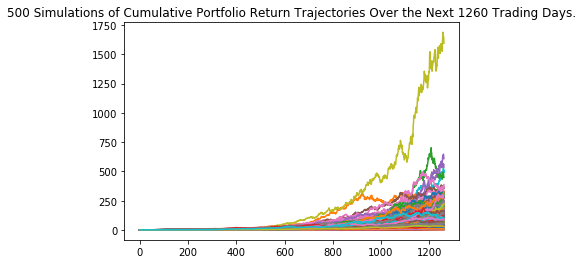

In [40]:
# Plot simulation outcomes
crypto_fiveyr_line_plot = MC_crypto_five_year.plot_simulation()

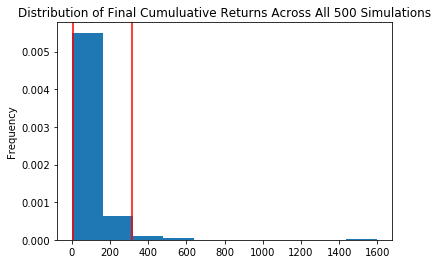

In [41]:
# Plot probability distribution and confidence intervals
crypto_fiveyr_dist_plot = MC_crypto_five_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
crypto_fiveyr_tbl = MC_crypto_five_year.summarize_cumulative_return()

# Print summary statistics
print(crypto_fiveyr_tbl)

count            500.000000
mean              84.564100
std              104.960436
min                2.600734
25%               30.237363
50%               54.839289
75%              104.383319
max             1595.050101
95% CI Lower       8.470824
95% CI Upper     317.974858
Name: 1260, dtype: float64


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_cryptofive = round(crypto_fiveyr_tbl[8],2)
ci_mean_cryptofive = round(crypto_fiveyr_tbl[1],2)
ci_upper_cryptofive = round(crypto_fiveyr_tbl[9],2)

print(ci_lower_cryptofive, ci_mean_cryptofive, ci_upper_cryptofive)

8.47 84.56 317.97


In [44]:
# S&P 500 and AGG Data for comparison to the traditional 60/40 stocks and bonds portfolio
spbondStrings = ['AGG', 'SPY']

spagg_close = yf.download(spbondStrings, group_by='Ticker', period='10y')

# Create CSV of ticker data
spagg_close.to_csv('spagg.csv')

spagg_close = spagg_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

spagg_close = pd.read_csv('spagg.csv', header=[0, 1])
spagg_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
spagg_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(spagg_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
spagg_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
spagg_close.index.name = None

# Drop Null Information
spagg_close = spagg_close.dropna()

# Sort Multi-Index To Match Weights
spagg_close = spagg_close.reindex(sorted(spagg_close.columns), axis=1)

spagg_close

[*********************100%***********************]  2 of 2 completed


AGG                                                  \
             Adj Close       Close        High         Low        Open   
2011-07-07   82.996346  106.570000  106.669998  106.449997  106.629997   
2011-07-08   83.424675  107.120003  107.199997  106.930000  106.980003   
2011-07-11   83.650497  107.410004  107.540001  107.250000  107.339996   
2011-07-12   83.720619  107.500000  107.610001  107.330002  107.510002   
2011-07-13   83.884132  107.709999  107.720001  107.400002  107.430000   
...                ...         ...         ...         ...         ...   
2021-06-29  115.094109  115.250000  115.250000  115.050003  115.059998   
2021-06-30  115.173996  115.330002  115.449997  115.300003  115.360001   
2021-07-01  115.110001  115.110001  115.190002  115.010002  115.150002   
2021-07-02  115.360001  115.360001  115.370003  115.169998  115.230003   
2021-07-06  115.730003  115.730003  115.830002  115.510002  115.510002   

                              SPY                                      \
               Volume   Adj Close       Close        High         Low   
2011-07-07  1291600.0  111.234261  135.360001  135.699997  134.880005   
2011-07-08   682800.0  110.445328  134.399994  135.360001  133.389999   
2011-07-11   615000.0  108.448463  131.970001  133.179993  131.660004   
2011-07-12   681500.0  107.980072  131.399994  132.779999  131.360001   
2011-07-13   508400.0  108.341629  131.839996  133.220001  131.520004   
...               ...         ...         ...         ...         ...   
2021-06-29  5097100.0  427.700012  427.700012  428.559998  427.130005   
2021-06-30  6653100.0  428.059998  428.059998  428.779999  427.179993   
2021-07-01  4744900.0  430.429993  430.429993  430.600006  428.799988   
2021-07-02  4312800.0  433.720001  433.720001  434.100006  430.519989   
2021-07-06  7367538.0  432.929993  432.929993  434.000000  430.010010   

                                     
                  Open       Volume  
2011-07-07  135.160004  170464200.0  
2011-07-08  133.830002  194100500.0  
2011-07-11  132.750000  195918600.0  
2011-07-12  131.690002  214675700.0  
2011-07-13  132.089996  204062600.0  
...                ...          ...  
2021-06-29  427.880005   35970500.0  
2021-06-30  427.209991   64827900.0  
2021-07-01  428.869995   53441000.0  
2021-07-02  431.670013   57679000.0  
2021-07-06  433.779999   68710419.0  

[2516 rows x 12 columns]

In [45]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_spagg_one_year = MCSimulation(
    portfolio_data = spagg_close,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [46]:
# Printing the simulation input data
MC_spagg_one_year.portfolio_data.head()

AGG                                                  \
            Adj Close       Close        High         Low        Open   
2011-07-07  82.996346  106.570000  106.669998  106.449997  106.629997   
2011-07-08  83.424675  107.120003  107.199997  106.930000  106.980003   
2011-07-11  83.650497  107.410004  107.540001  107.250000  107.339996   
2011-07-12  83.720619  107.500000  107.610001  107.330002  107.510002   
2011-07-13  83.884132  107.709999  107.720001  107.400002  107.430000   

                                           SPY                          \
               Volume daily_return   Adj Close       Close        High   
2011-07-07  1291600.0          NaN  111.234261  135.360001  135.699997   
2011-07-08   682800.0     0.005161  110.445328  134.399994  135.360001   
2011-07-11   615000.0     0.002707  108.448463  131.970001  133.179993   
2011-07-12   681500.0     0.000838  107.980072  131.399994  132.779999   
2011-07-13   508400.0     0.001953  108.341629  131.839996  133.220001   

                                                              
                   Low        Open       Volume daily_return  
2011-07-07  134.880005  135.160004  170464200.0          NaN  
2011-07-08  133.389999  133.830002  194100500.0    -0.007092  
2011-07-11  131.660004  132.750000  195918600.0    -0.018080  
2011-07-12  131.360001  131.690002  214675700.0    -0.004319  
2011-07-13  131.520004  132.089996  204062600.0     0.003349

In [47]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_spagg_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.011351  0.995850  0.996436  1.001285  1.007352  1.001978  0.997625   
2    1.010881  0.998717  0.992883  0.989769  1.022428  1.005019  0.998708   
3    1.016095  1.003837  0.999411  0.996659  1.023516  1.003074  1.001262   
4    1.017836  1.002944  0.998695  0.985283  1.036473  1.003938  0.999986   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.053754  1.121104  1.124699  1.278619  1.004645  0.948141  1.060889   
249  1.051050  1.120139  1.139708  1.284062  1.017299  0.956571  1.063640   
250  1.053257  1.103712  1.142931  1.290032  1.028954  0.954685  1.071388   
251  1.050482  1.096744  1.134162  1.295856  1.033509  0.953347  1.061295   
252  1.044857  1.103461  1.129890  1.299290  1.036582  0.948361  1.066394   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.999768  0.997359  1.006304  ...  1.004885  1.002476  1.000564   
2    0.999349  0.997130  0.999243  ...  1.001404  1.001778  1.005525   
3    0.997549  0.999949  0.992050  ...  1.000555  1.008232  1.006457   
4    1.008079  0.998047  0.993561  ...  1.001126  1.012562  0.998884   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.057121  1.076194  1.138844  ...  0.993096  1.042775  0.988276   
249  1.061272  1.081992  1.139996  ...  0.988574  1.048542  0.989748   
250  1.048299  1.076602  1.143622  ...  0.987588  1.044358  0.992827   
251  1.047026  1.079990  1.153320  ...  0.988175  1.041072  0.994448   
252  1.049752  1.083440  1.164300  ...  0.983535  1.034725  0.990443   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.000380  1.000997  1.003397  1.002613  0.998658  1.006756  1.011410  
2    1.005653  0.993391  1.002376  1.007182  1.005368  1.014413  1.016281  
3    0.997569  0.982016  1.003786  1.008415  1.013457  1.001174  1.018972  
4    1.004888  0.986813  1.001351  1.003080  1.013749  1.013131  1.021585  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.007657  1.080684  0.990724  1.268233  1.073842  1.194609  1.218057  
249  1.013038  1.063600  1.001661  1.270149  1.069937  1.198579  1.223735  
250  1.013211  1.063420  1.004310  1.271365  1.065906  1.215368  1.223717  
251  1.013545  1.078494  1.010007  1.275781  1.064888  1.213908  1.241251  
252  1.007252  1.072295  1.010966  1.291207  1.064217  1.222969  1.242780  

[253 rows x 500 columns]

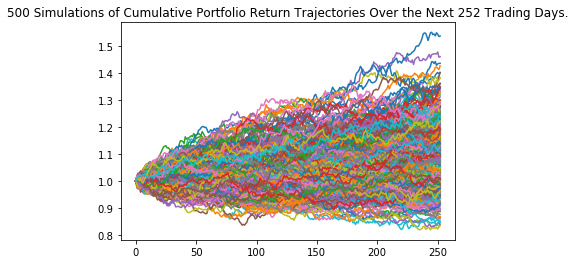

In [48]:
# Plot simulation outcomes
spagg_oneyr_line_plot = MC_spagg_one_year.plot_simulation()

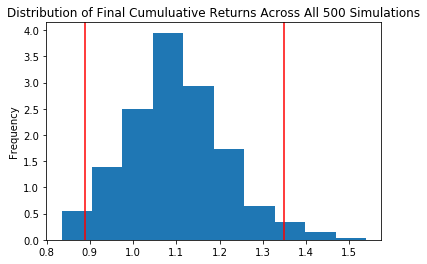

In [49]:
# Plot probability distribution and confidence intervals
spagg_oneyr_dist_plot = MC_spagg_one_year.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
spagg_oneyr_tbl = MC_spagg_one_year.summarize_cumulative_return()

# Print summary statistics
print(spagg_oneyr_tbl)

count           500.000000
mean              1.097786
std               0.114110
min               0.834750
25%               1.021884
50%               1.093502
75%               1.167592
max               1.538546
95% CI Lower      0.888484
95% CI Upper      1.347951
Name: 252, dtype: float64


In [51]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_spaggone = round(spagg_oneyr_tbl[8],2)
ci_mean_spaggone = round(spagg_oneyr_tbl[1],2)
ci_upper_spaggone = round(spagg_oneyr_tbl[9],2)

print(ci_lower_spaggone, ci_mean_spaggone, ci_upper_spaggone)

0.89 1.1 1.35


In [52]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_spagg_five_year = MCSimulation(
    portfolio_data = spagg_close,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [53]:
# Printing the simulation input data
MC_spagg_five_year.portfolio_data.head()

AGG                                                  \
            Adj Close       Close        High         Low        Open   
2011-07-07  82.996346  106.570000  106.669998  106.449997  106.629997   
2011-07-08  83.424675  107.120003  107.199997  106.930000  106.980003   
2011-07-11  83.650497  107.410004  107.540001  107.250000  107.339996   
2011-07-12  83.720619  107.500000  107.610001  107.330002  107.510002   
2011-07-13  83.884132  107.709999  107.720001  107.400002  107.430000   

                                           SPY                          \
               Volume daily_return   Adj Close       Close        High   
2011-07-07  1291600.0          NaN  111.234261  135.360001  135.699997   
2011-07-08   682800.0     0.005161  110.445328  134.399994  135.360001   
2011-07-11   615000.0     0.002707  108.448463  131.970001  133.179993   
2011-07-12   681500.0     0.000838  107.980072  131.399994  132.779999   
2011-07-13   508400.0     0.001953  108.341629  131.839996  133.220001   

                                                              
                   Low        Open       Volume daily_return  
2011-07-07  134.880005  135.160004  170464200.0          NaN  
2011-07-08  133.389999  133.830002  194100500.0    -0.007092  
2011-07-11  131.660004  132.750000  195918600.0    -0.018080  
2011-07-12  131.360001  131.690002  214675700.0    -0.004319  
2011-07-13  131.520004  132.089996  204062600.0     0.003349

In [54]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_spagg_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997930  0.997850  0.994952  0.999830  0.998104  1.008659  0.997771   
2     0.993056  0.991092  0.990750  0.997838  0.993325  1.004274  0.995596   
3     1.002538  1.000339  0.989631  1.005347  0.988272  1.013813  0.987821   
4     1.004694  0.981863  0.981017  1.007407  0.987583  1.022754  0.988127   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.197812  1.826961  1.098706  1.298746  1.235736  0.940243  1.184134   
1257  1.193019  1.815984  1.102207  1.305029  1.239666  0.945077  1.179074   
1258  1.199663  1.816494  1.106365  1.291431  1.231336  0.941955  1.158376   
1259  1.211575  1.829693  1.105513  1.287887  1.222170  0.941345  1.157230   
1260  1.211138  1.838764  1.104102  1.285007  1.223213  0.943657  1.163645   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006573  1.002417  0.992725  ...  1.013399  1.004321  1.003632   
2     1.001261  1.015066  0.991019  ...  1.013692  1.006565  1.003806   
3     1.004007  1.011740  0.994756  ...  1.010708  1.002866  1.001239   
4     1.003874  0.995497  0.989450  ...  1.008703  1.007096  0.998522   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.348543  1.041439  1.752946  ...  1.488247  1.276623  1.490182   
1257  1.350443  1.052215  1.732014  ...  1.475016  1.260425  1.484944   
1258  1.341974  1.058523  1.727972  ...  1.472309  1.265322  1.501326   
1259  1.343932  1.061358  1.735517  ...  1.467171  1.260604  1.488750   
1260  1.340936  1.058545  1.747131  ...  1.472979  1.254671  1.493384   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.993227  1.007012  0.996121  0.997218  1.004819  1.005145  1.010740  
2     0.995078  1.012864  1.002676  0.994380  1.011631  1.006396  1.004611  
3     0.992363  1.018777  1.002654  0.999595  1.010102  1.015231  0.994979  
4     0.985977  1.008888  1.013570  0.990968  0.999322  1.003945  1.004267  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.465298  2.700521  1.598469  1.132180  1.263787  1.312902  1.288484  
1257  1.459802  2.728039  1.574157  1.134183  1.264867  1.318125  1.281381  
1258  1.454170  2.717811  1.588420  1.136687  1.270503  1.321257  1.282809  
1259  1.457014  2.727319  1.575519  1.136253  1.274095  1.332808  1.272239  
1260  1.477827  2.734295  1.592154  1.147455  1.278679  1.350570  1.276006  

[1261 rows x 500 columns]

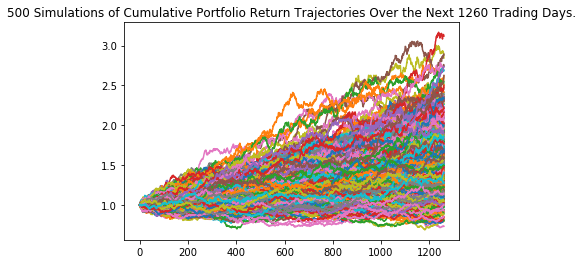

In [55]:
# Plot simulation outcomes
spagg_fiveyr_line_plot = MC_spagg_five_year.plot_simulation()

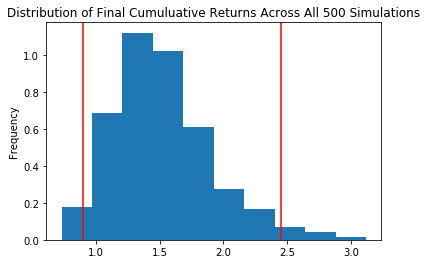

In [56]:
# Plot probability distribution and confidence intervals
spagg_fiveyr_dist_plot = MC_spagg_five_year.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
spagg_fiveyr_tbl = MC_spagg_five_year.summarize_cumulative_return()

# Print summary statistics
print(spagg_fiveyr_tbl)

count           500.000000
mean              1.520787
std               0.387226
min               0.731681
25%               1.253353
50%               1.476507
75%               1.733448
max               3.117649
95% CI Lower      0.901607
95% CI Upper      2.447860
Name: 1260, dtype: float64


In [58]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_spaggfive = round(spagg_fiveyr_tbl[8],2)
ci_mean_spaggfive = round(spagg_fiveyr_tbl[1],2)
ci_upper_spaggfive = round(spagg_fiveyr_tbl[9],2)

print(ci_lower_spaggfive, ci_mean_spaggfive, ci_upper_spaggfive)

0.9 1.52 2.45


In [59]:
# QQQ and SPY Data for comparisons to either the Nasdaq or S&P 500 indexes
qqqStrings = ['QQQ', 'SPY']

qqq_close = yf.download(qqqStrings, group_by='Ticker', period='10y')

# Create CSV of ticker data
qqq_close.to_csv('qqq.csv')

qqq_close = qqq_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

qqq_close = pd.read_csv('qqq.csv', header=[0, 1])
qqq_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
qqq_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(qqq_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
qqq_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
qqq_close.index.name = None

# Drop Null Information
qqq_close = qqq_close.dropna()

# Sort Multi-Index To Match Weights
qqq_close = qqq_close.reindex(sorted(qqq_close.columns), axis=1)

qqq_close

[*********************100%***********************]  2 of 2 completed


QQQ                                                  \
             Adj Close       Close        High         Low        Open   
2011-07-07   53.565018   59.189999   59.360001   58.740002   58.830002   
2011-07-08   53.420204   59.029999   59.040001   58.369999   58.680000   
2011-07-11   52.451885   57.959999   58.709999   57.759998   58.410000   
2011-07-12   52.053707   57.520000   58.070000   57.459999   57.950001   
2011-07-13   52.270912   57.759998   58.340000   57.549999   57.939999   
...                ...         ...         ...         ...         ...   
2021-06-29  354.989990  354.989990  355.019989  352.670013  353.529999   
2021-06-30  354.429993  354.429993  355.230011  353.829987  354.829987   
2021-07-01  354.570007  354.570007  355.089996  352.679993  354.070007   
2021-07-02  358.640015  358.640015  358.970001  356.279999  356.519989   
2021-07-06  360.190002  360.190002  360.470001  356.489990  359.260010   

                               SPY                                      \
                Volume   Adj Close       Close        High         Low   
2011-07-07  54799800.0  111.234261  135.360001  135.699997  134.880005   
2011-07-08  69519500.0  110.445328  134.399994  135.360001  133.389999   
2011-07-11  52080800.0  108.448463  131.970001  133.179993  131.660004   
2011-07-12  84000700.0  107.980072  131.399994  132.779999  131.360001   
2011-07-13  82378100.0  108.341629  131.839996  133.220001  131.520004   
...                ...         ...         ...         ...         ...   
2021-06-29  29426000.0  427.700012  427.700012  428.559998  427.130005   
2021-06-30  32724000.0  428.059998  428.059998  428.779999  427.179993   
2021-07-01  29290000.0  430.429993  430.429993  430.600006  428.799988   
2021-07-02  32715600.0  433.720001  433.720001  434.100006  430.519989   
2021-07-06  37116648.0  432.929993  432.929993  434.000000  430.010010   

                                     
                  Open       Volume  
2011-07-07  135.160004  170464200.0  
2011-07-08  133.830002  194100500.0  
2011-07-11  132.750000  195918600.0  
2011-07-12  131.690002  214675700.0  
2011-07-13  132.089996  204062600.0  
...                ...          ...  
2021-06-29  427.880005   35970500.0  
2021-06-30  427.209991   64827900.0  
2021-07-01  428.869995   53441000.0  
2021-07-02  431.670013   57679000.0  
2021-07-06  433.779999   68710419.0  

[2516 rows x 12 columns]

In [60]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_qqq_one_year = MCSimulation(
    portfolio_data = qqq_close,
    weights = [1, 0],
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [61]:
# Printing the simulation input data
MC_qqq_one_year.portfolio_data.head()

QQQ                                                          \
            Adj Close      Close       High        Low       Open      Volume   
2011-07-07  53.565018  59.189999  59.360001  58.740002  58.830002  54799800.0   
2011-07-08  53.420204  59.029999  59.040001  58.369999  58.680000  69519500.0   
2011-07-11  52.451885  57.959999  58.709999  57.759998  58.410000  52080800.0   
2011-07-12  52.053707  57.520000  58.070000  57.459999  57.950001  84000700.0   
2011-07-13  52.270912  57.759998  58.340000  57.549999  57.939999  82378100.0   

                                SPY                                      \
           daily_return   Adj Close       Close        High         Low   
2011-07-07          NaN  111.234261  135.360001  135.699997  134.880005   
2011-07-08    -0.002703  110.445328  134.399994  135.360001  133.389999   
2011-07-11    -0.018126  108.448463  131.970001  133.179993  131.660004   
2011-07-12    -0.007591  107.980072  131.399994  132.779999  131.360001   
2011-07-13     0.004172  108.341629  131.839996  133.220001  131.520004   

                                                  
                  Open       Volume daily_return  
2011-07-07  135.160004  170464200.0          NaN  
2011-07-08  133.830002  194100500.0    -0.007092  
2011-07-11  132.750000  195918600.0    -0.018080  
2011-07-12  131.690002  214675700.0    -0.004319  
2011-07-13  132.089996  204062600.0     0.003349

In [62]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_qqq_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.014361  0.998590  1.010838  1.003557  0.982217  0.997907  1.001629   
2    1.025232  1.017716  1.012202  1.007738  0.994390  1.017398  0.996978   
3    1.007645  1.040039  1.003748  0.989574  0.973922  1.011933  1.002004   
4    1.009255  1.048417  1.011394  1.000451  0.979019  0.998627  1.000967   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.100314  1.023786  1.532883  0.984476  1.226495  1.030028  1.763684   
249  1.098590  0.993336  1.558988  0.970574  1.230137  1.045860  1.758248   
250  1.074275  1.006774  1.554482  0.939395  1.200074  1.065408  1.725533   
251  1.064834  0.994229  1.569851  0.927186  1.208987  1.058135  1.716179   
252  1.062035  0.984307  1.555479  0.944165  1.203333  1.072219  1.719386   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.988186  0.984088  0.983794  ...  0.964274  1.007406  0.988790   
2    1.010045  0.975804  0.985570  ...  0.975541  1.013298  1.010953   
3    1.034550  0.999046  0.982771  ...  0.996350  1.017378  1.025624   
4    1.022343  0.985462  0.979391  ...  1.013763  1.022920  1.043682   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.000538  1.410904  0.961237  ...  1.531964  1.238057  1.246594   
249  1.020854  1.425776  0.978528  ...  1.549891  1.265348  1.233309   
250  1.029878  1.421155  0.991404  ...  1.551867  1.265423  1.253328   
251  1.047538  1.439479  0.987885  ...  1.564304  1.274485  1.259792   
252  1.048686  1.416158  0.972606  ...  1.579395  1.255915  1.253452   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.018666  1.004288  1.002315  1.008957  1.008241  0.996592  0.985896  
2    1.005081  1.001967  0.989560  1.026881  1.013723  1.003569  0.968308  
3    1.009193  1.002879  1.009657  1.038502  1.025076  1.013076  0.975693  
4    1.023089  1.020299  1.015518  1.039618  1.008171  1.021251  0.975494  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.016892  1.279262  1.240745  1.407290  1.470462  1.169849  1.173192  
249  1.033830  1.248047  1.256109  1.400066  1.457979  1.167430  1.163545  
250  1.032966  1.226889  1.261153  1.399532  1.480486  1.196427  1.163803  
251  1.041722  1.241333  1.239048  1.402640  1.498106  1.208449  1.129096  
252  1.054871  1.240493  1.246571  1.358047  1.489053  1.211470  1.119860  

[253 rows x 500 columns]

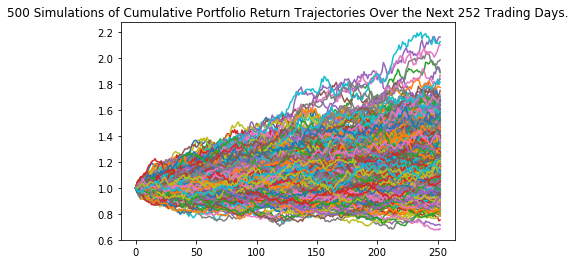

In [63]:
# Plot simulation outcomes
qqq_oneyr_line_plot = MC_qqq_one_year.plot_simulation()

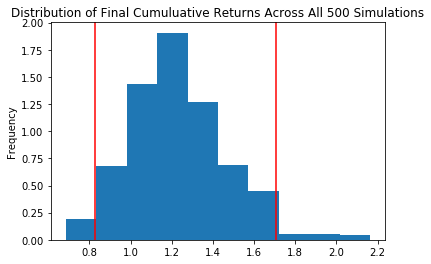

In [64]:
# Plot probability distribution and confidence intervals
qqq_oneyr_dist_plot = MC_qqq_one_year.plot_distribution()

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
qqq_oneyr_tbl = MC_qqq_one_year.summarize_cumulative_return()

# Print summary statistics
print(qqq_oneyr_tbl)

count           500.000000
mean              1.236743
std               0.236932
min               0.685546
25%               1.074746
50%               1.217965
75%               1.378305
max               2.164109
95% CI Lower      0.827633
95% CI Upper      1.706467
Name: 252, dtype: float64


In [66]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_qqqone = round(qqq_oneyr_tbl[8],2)
ci_mean_qqqone = round(qqq_oneyr_tbl[1],2)
ci_upper_qqqone = round(qqq_oneyr_tbl[9],2)

print(ci_lower_qqqone, ci_mean_qqqone, ci_upper_qqqone)

0.83 1.24 1.71


In [67]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_qqq_five_year = MCSimulation(
    portfolio_data = qqq_close,
    weights = [1, 0],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [68]:
# Printing the simulation input data
MC_qqq_five_year.portfolio_data.head()

QQQ                                                          \
            Adj Close      Close       High        Low       Open      Volume   
2011-07-07  53.565018  59.189999  59.360001  58.740002  58.830002  54799800.0   
2011-07-08  53.420204  59.029999  59.040001  58.369999  58.680000  69519500.0   
2011-07-11  52.451885  57.959999  58.709999  57.759998  58.410000  52080800.0   
2011-07-12  52.053707  57.520000  58.070000  57.459999  57.950001  84000700.0   
2011-07-13  52.270912  57.759998  58.340000  57.549999  57.939999  82378100.0   

                                SPY                                      \
           daily_return   Adj Close       Close        High         Low   
2011-07-07          NaN  111.234261  135.360001  135.699997  134.880005   
2011-07-08    -0.002703  110.445328  134.399994  135.360001  133.389999   
2011-07-11    -0.018126  108.448463  131.970001  133.179993  131.660004   
2011-07-12    -0.007591  107.980072  131.399994  132.779999  131.360001   
2011-07-13     0.004172  108.341629  131.839996  133.220001  131.520004   

                                                  
                  Open       Volume daily_return  
2011-07-07  135.160004  170464200.0          NaN  
2011-07-08  133.830002  194100500.0    -0.007092  
2011-07-11  132.750000  195918600.0    -0.018080  
2011-07-12  131.690002  214675700.0    -0.004319  
2011-07-13  132.089996  204062600.0     0.003349

In [69]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_qqq_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.019359  0.999730  1.025000  1.025473  1.017320  1.014117  1.022123   
2     1.043665  1.007047  1.039199  1.018685  1.019789  1.009558  1.035588   
3     1.043040  1.005140  1.050971  0.993777  1.023319  1.014948  1.024162   
4     1.028305  1.005781  1.045748  1.000312  1.020103  1.000647  1.020866   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.386521  4.313961  3.406151  2.223741  3.108761  4.183589  2.012263   
1257  1.364802  4.345650  3.440388  2.217619  3.112382  4.265368  2.005480   
1258  1.355353  4.401670  3.474544  2.207506  3.077902  4.244174  1.993456   
1259  1.358977  4.468435  3.456558  2.219104  3.088173  4.246698  2.018401   
1260  1.372565  4.502021  3.461291  2.258418  3.037046  4.255617  2.003322   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003696  1.013466  1.005247  ...  1.004233  1.007801  0.994380   
2     1.033392  1.013141  0.996071  ...  1.008538  0.995543  1.007941   
3     1.018250  1.028126  0.985278  ...  1.004638  1.016188  1.007573   
4     1.041442  1.053192  0.995431  ...  0.995143  0.989306  0.986420   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.273743  2.653735  4.243002  ...  1.538918  3.107123  3.222776   
1257  2.241632  2.669193  4.264190  ...  1.503000  3.081678  3.217744   
1258  2.233765  2.629888  4.334512  ...  1.521185  3.116035  3.130442   
1259  2.262944  2.635431  4.361743  ...  1.517888  3.106294  3.105764   
1260  2.289514  2.627461  4.305501  ...  1.498244  3.098997  3.104994   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.985444  0.993607  0.995056  1.009939  0.989022  0.999024  1.007035  
2     0.969458  1.001971  1.005064  1.003519  1.008923  1.007085  1.001578  
3     0.947114  0.988140  0.999669  1.011503  1.011190  1.006856  1.035636  
4     0.942324  0.992824  1.001717  1.004479  1.026217  1.032010  1.013045  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.178875  1.445690  5.044034  2.223226  1.252513  1.843935  1.393627  
1257  2.197240  1.415487  4.930033  2.229978  1.259957  1.812769  1.379822  
1258  2.154603  1.435128  5.041557  2.213005  1.228633  1.764879  1.394137  
1259  2.170142  1.439127  5.029007  2.198389  1.207128  1.802358  1.394491  
1260  2.187822  1.415000  5.071460  2.201752  1.196868  1.797489  1.391720  

[1261 rows x 500 columns]

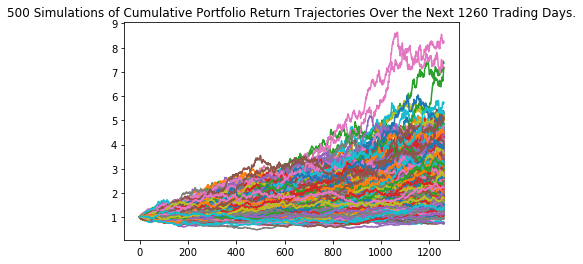

In [70]:
# Plot simulation outcomes
qqq_fiveyr_line_plot = MC_qqq_five_year.plot_simulation()

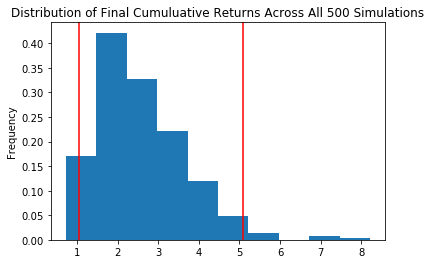

In [71]:
# Plot probability distribution and confidence intervals
qqq_fiveyr_dist_plot = MC_qqq_five_year.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
qqq_fiveyr_tbl = MC_qqq_five_year.summarize_cumulative_return()

# Print summary statistics
print(qqq_fiveyr_tbl)

count           500.000000
mean              2.571688
std               1.089155
min               0.723761
25%               1.768409
50%               2.325988
75%               3.181442
max               8.217753
95% CI Lower      1.057436
95% CI Upper      5.083330
Name: 1260, dtype: float64


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_qqqfive = round(qqq_fiveyr_tbl[8],2)
ci_mean_qqqfive = round(qqq_fiveyr_tbl[1],2)
ci_upper_qqqfive = round(qqq_fiveyr_tbl[9],2)

print(ci_lower_qqqfive, ci_mean_qqqfive, ci_upper_qqqfive)

1.06 2.57 5.08


In [74]:
##Dashboard Setup
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Investment Portfolio Analysis and Forecasting
""",
    width=800,
)

# Define a welcome text
welcome = pn.pane.Markdown(
    """
# Project 1: Portfolio Analysis, Simulations and Benchmark Comparison
## Motivation and Summary
### Spreadsheets are getting outdated and overrated with the addition of more efficient methods of analyzing data. Updating a spreadsheet with data even prior to performing analysis can take hours. However, in this bootcamp we have learned methods to more efficiently retrieve and analyze data using Python and Jupyter Lab. The purpose of this project is to develop a notebook that uses the power of portfolio and risk analysis spreadsheets into one servable dashboard that can be viewed by the user/client. 
### Question: 
#### 1. How do I create a dashboard for my stock and crypto portfolio? We asked this question because we learned in our bootcamp classes how to build a dashboard for real estate analysis and mapping data. In this assignment we saw the power of creating a dashboard and providing deliverable and servable information to clients and users.
#### 2. How does the inputted portfolio compare to a traditional 60/40 Stocks and Bonds Strategy and other benchmark indexes? We asked this question to provide information to the client/user on the most important aspect of portfolio management being risk analysis. We wanted the use of simulations and forecasted returns to show the risk structure of the portfolio compared to the market benchmarks. 
#### 3. What is the forecasted return? We asked this question to provide the actual numeric forecasted returns in dollar amount based on 1-year and 5-year projections. We wanted to provide the exact value of the expected return for the inputted portfolio. 
### In summary, we were successful in meeting our goals for the requirements of the project and included possible further work in the Postmortem below. We found that our selection of stocks being more growth oriented had shown a high-risk structure with a high beta compared to the benchmark indexes. As we suspected and as a result of the recent strength of growth stocks and assets, the portfolio has a much higher expected return compared to benchmarks. The volatility and growth potential of having a small percentage of the portfolio in crypto assets can also return larger than expected returns even when using low probability simulations. 
## Questions & Data
### Answer: 
#### 1. We used the Panel library to create a dashboard for our investment portfolio with tabs showing the deliverable and servable information for the client/user. The tabs include a Welcome description including this read.me file, the inputted portfolio, percentage allocations, expected returns and benchmark simulations and expected returns. The information is presented in the form of graphical plots and calculation statements based on data calculated in the simulations. 
#### 2. We used Monte Carlo Simulations to forecast potential expected returns. The benchmark indexes include the S&P 500 and the Nasdaq. Simulations were conducted for the stock portfolio, crypto portfolio, a 60/40 Stocks and Bonds portfolio and the benchmark indexes for a 1-year and 5-year timeframe. The forecasted returns shown in each simulation plot provide data on the average expected returns within 95% confidenc eof simulated outcomes. The calculations for average returns, minimums and maximums paint a picture that shows the difference in the risk structure of the portfolio compared to the benchmarks. 
#### 3. The Yahoo Finance API provides a constant connection of market data to the notebook. Using the data from the API in CSV format we were able to create our own dataframes that construct the inputted portfolio for the client/user. This means that the notebook can be run on a constant frequency to provide data and forecasts over any desired timeframe. The recommended timeframe is either monthly, quarterly or bi-yearly for adjustments of position sizes and portfolio management. 

## Data Cleanup & Exploration
### Data collection was completed with the use of The Yahoo Finance API or more specifically the y.finance library. Stock market information as collected using this library for each asset of stocks and cryptos into CSV format and readable in the notebook as a dataframe. The dataframe for stock market information was indexed for each ticker and spanned as far as the information is available or to a maximum of 10 years.
### Stocks: (10)
#### 1. QQQ (NASDAQ)
#### 2. CIBC
#### 3. MSFT
#### 4. ASUS
#### 5. TSLA
#### 6. PFE
#### 7. NVDA
#### 8. F
#### 9. CCL
#### 10. AC
### Crypto: (5)
#### 1. Bitcoin
#### 2. Ethereum
#### 3. Cardano
#### 4. Chainlink
#### 5. Litecoin
### We found that running a simulation for the complete portfolio of stocks and crypto was a little bit misleading and did not provide the full information of the risk structure. We then chose to make more sense of the data in the simulations by running separate simulations for each of the stocks and the cryptos. After doing this we were able to see the true effect of having a small allocation to cryptos in the portfolio to increase expected returns. Another issue we focused on was the limited amount of market data for cryptos which resulted in less accurate simulations compared to the stock simulations. We worked around this by using the crypto tickers in USD currency as there was more time data for these tickers and gave more historical data to work with. 

## Data Analysis
### The simulated average return for the stock portfolio over a 5-year period was 5x the original investment. The simulated average return for the crypto portfolio over a 5-year period was 89x the original investment. The simulated average return for the 60/40 Stocks and Bonds portfolio over a 5-year period was 1.5x the original investment or a 50% increase. The simulated average return for the Nasdaq index over a 5-year period was 2.7x the original investment. The results compiled here show that simply investing money into the benchmark indexes yields a much larger expected return over a 5-year period compared to the traditional 60/40 Stock and Bonds portfolio. Furthermore, for the investors that are willing to put in more work into picking individual stocks and look to outperform the market indexes returns by using growth stocks similar to the ones chosen in this project. The simulation do not factor in dividends and dividend growth and a separate calculations for expected returns would need to be done to consider the full expected return. For the simulations done on the shorter 1-year timeframe, the short-term risk that is shown by the simulations with negative returns or using the minimum value. These simulations show that the choice of growth stock in the inputted portfolio can offer larger than expected returns in both the long-term and the short term. Furthermore, with more volatile stocks and cryptos also come with the risk of lower than expected or negative returns in the short-term depending on market conditions. 

## Discussion
## The resulting analysis proves that the 60/40 Stocks and Bonds strategy is the most conservative form of investing. For people with a larger investment window of greater than 5-years, investing in market indexes seems to be the more common strategy in modern days and yields a much larger expected return with minimal increase in risk. For the people who are willing to do more than plow their money into one or two market indexes or ETF's, building a diversified investment portfolio of stocks spread across the various market sectors and with a small allocation of <10% can yield larger than expected returns. The creation of your own portfolio is at the very least the acceptance of the challenge of beating and out-performing the stock market and other hedge funds.

## Postmortem 
### - Selector for user interaction to modify analysis information.
### - Include columns in the portfolio table for current market value and a portfolio position weighting using the ATR of each asset. 
### - Input function for tickers, share amount and share price. 
### - Add an additional column for sector and provide a pie chart for sector allocation which shows the diversification of assets.
""",
    width=1024,
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    # First tab
    (
        "Welcome",
        pn.Column(
            welcome
        )
    ),
    # Second tab
    (
        "My Portfolio",
        pn.Column(
                pn.Row(totalportfoliotable, totalportsorted),
                pn.Row(stockportfoliotable, stockportsorted),
                pn.Row(cryptoportfoliotable, cryptoportsorted)
        )
    ),
    # Third tab
    (
        "Portfolio Monte Carlo Simulation and Forecasted Returns",
        pn.Column(
                pn.Row("##Stock Portfolio 1-year Simulation", stock_oneyr_line_plot, stock_oneyr_dist_plot, stock_oneyr_tbl),
                pn.Row("##Stock Portfolio 5-year Simulation", stock_fiveyr_line_plot, stock_fiveyr_dist_plot, stock_fiveyr_tbl),
                "The 1-year expected returns for the stock portfolio is {totalstockvalue * ci_mean_stockone} ",
                ",",
                pn.Row("##Crypto Portfolio 1-year Simulation", crypto_oneyr_line_plot, crypto_oneyr_dist_plot, crypto_oneyr_tbl),
                pn.Row("##Crypto Portfolio 5-year Simulation", crypto_fiveyr_line_plot, crypto_fiveyr_dist_plot, crypto_fiveyr_tbl),
                "",
                ""
        )
    ),
    # Forth Tab
    (
        "Benchmark Monte Carlo Simulations and Forecasted Returns",
        pn.Column(
                pn.Row("##60/40 Stocks and Bonds Portfolio 1-year Simulation", spagg_oneyr_line_plot, spagg_oneyr_dist_plot, spagg_oneyr_tbl),
                pn.Row("##60/40 Stocks and Bonds Portfolio 5-year Simulation", spagg_fiveyr_line_plot, spagg_fiveyr_dist_plot, spagg_fiveyr_tbl),
                "",
                pn.Row("##Nasdaq Benchmark 1-year Simulation", qqq_oneyr_line_plot, qqq_oneyr_dist_plot, qqq_oneyr_tbl),
                pn.Row("##Nasdaq Benchmark 5-year Simulation", qqq_fiveyr_line_plot, qqq_fiveyr_dist_plot, qqq_fiveyr_tbl),
                ""
        )
    )
)

# Create the main dashboard
dashboard = pn.Column(
    pn.Row(title),
    tabs,
    width=1024,
    height=768
)

In [75]:
dashboard.servable()

Column(height=768, sizing_mode='fixed', width=1024)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=1024)
        [1] Column
            [0] Row
                [0] DataFrame(DataFrame)
                [1] Str(AxesSubplot)
            [1] Row
                [0] DataFrame(DataFrame)
                [1] Str(AxesSubplot)
            [2] Row
                [0] DataFrame(DataFrame)
                [1] Str(AxesSubplot)
        [2] Column
            [0] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [1] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [2] Markdown(str)
            [3] Markdown(str)
            [4] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [5] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [6] Markdown(str)
            [7] Markdown(str)
        [3] Column
            [0] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [1] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [2] Markdown(str)
            [3] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [4] Row
                [0] Markdown(str)
                [1] Str(AxesSubplot)
                [2] Str(AxesSubplot)
                [3] DataFrame(Series)
            [5] Markdown(str)